# GAUSSIAN SMOOTHING


In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

def gausian_kernel(size,sigma): # create kernel
    n= int(math.floor(size/2))
    kernel= np.zeros((size,1))
    for k in range(-n,n+1):  
        gaus = (1/np.sqrt(2*math.pi*float(sigma)**2))*np.exp((-n**2)/(2*float(sigma**2)))
        kernel[n+k][0]=gaus
    return kernel/kernel.sum()

def Filter(image,kernel):
    assert kernel.shape[0]%2==1 and kernel.shape[1]%2==1
    k_hh,k_hw =int(math.floor(kernel.shape[0]/2)),int(math.floor(kernel.shape[1]/2))
    h,w = image.shape
    image_float = cv.normalize(image.astype('float'),None,0.0,1.0,cv.NORM_MINMAX)
    g_filter = np.zeros(image.shape,'float')
    for i in range(k_hh,h-k_hh):
        for j in range(k_hw,w-k_hw):
            g_filter[i,j]=np.dot(image_float[i-k_hh:i+k_hh+1,j-k_hw:j+k_hw+1].flatten(),kernel.flatten())
    return g_filter

#get an original image
img1= cv.imread('image3.jpg',cv.IMREAD_GRAYSCALE)
#applying guassian filter
sigma=3
size=5
kernel1= gausian_kernel(size,sigma)
smoothed_image=Filter(img1,kernel1)

cv.namedWindow('Original',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',img1)
cv.waitKey(0)

cv.namedWindow('processed',cv.WINDOW_AUTOSIZE)
cv.imshow('processed',smoothed_image)
cv.waitKey(0)
cv.destroyAllWindows()
    

# UNSHARP MASKING

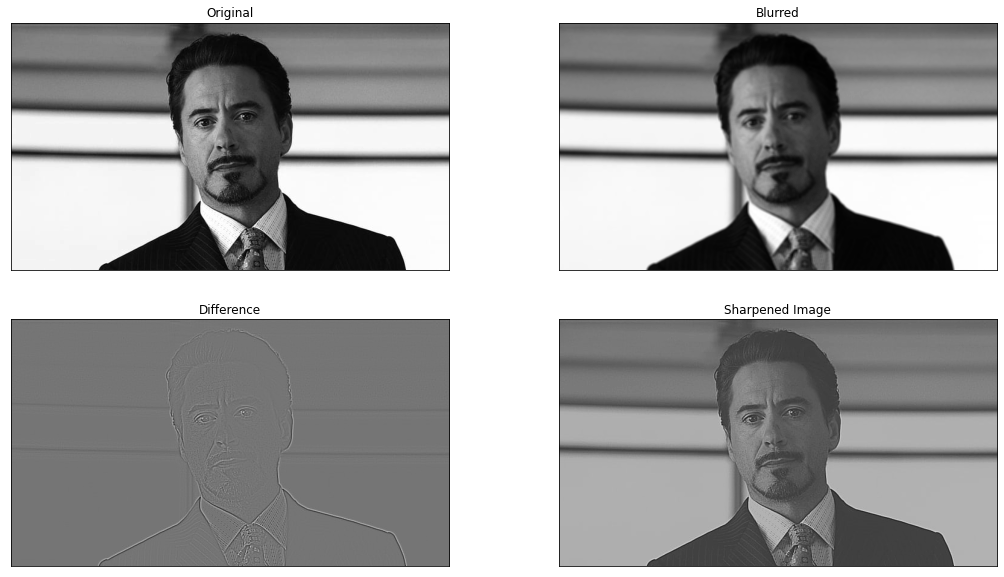

In [20]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

ori_image = cv.imread('image3.jpg', cv.IMREAD_GRAYSCALE)
sigma = 3
ksize=5
kernel = cv.getGaussianKernel(ksize, sigma)
image_blur = cv.sepFilter2D(ori_image, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
sharp_difference = ori_image.astype('float32') - image_blur.astype('float32')
image_sharpned = cv.addWeighted(ori_image.astype('float32') , 1.0, sharp_difference, 1.0, 0)

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,10))
axes[0,0].imshow(ori_image, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(image_blur, cmap='gray')
axes[0,1].set_title('Blurred')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[1,0].imshow(sharp_difference + 125, cmap='gray')
axes[1,0].set_title('Difference')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(image_sharpned, cmap='gray')
axes[1,1].set_title('Sharpened Image')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
plt.show()


# MEDIAN FILTERING

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

image = cv.imread('salt1.jpg',cv.IMREAD_GRAYSCALE)
kernel = np.zeros([3,3]).astype('uint8')

def filter(image,kernel):
    assert kernel.shape[0]%2==1 and kernel.shape[1]%2==1 
    k_h,k_w = int(math.floor(kernel.shape[0]/2)),int(math.floor(kernel.shape[1]/2))
    h,w = image.shape
    result = np.zeros(image.shape).astype('uint8')

    for i in range(k_h,h-k_h):
        for j in range(k_w,w-k_w):
            kernel = image[i-k_h:i+k_h+1,j-k_w:j+k_w+1].flatten()
            s_kernel=sorted(kernel)
            median = s_kernel[int(len(s_kernel)/2)]
            result[i,j]=median #Replace the middle value with median
    return result

median_image=filter(image,kernel)

cv.namedWindow('hh',cv.WINDOW_NORMAL)
cv.imshow('Image',image)
cv.waitKey(0)
cv.namedWindow('hh1',cv.WINDOW_NORMAL)
cv.imshow('Image2',median_image)

#cv.imwrite('7.image_Orig.jpg',image)
#cv.imwrite('7.image_Proce.jpg',result)
cv.waitKey(0)
cv.destroyAllWindows()



# BILATERAL FILTERING

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread('image3.jpg',cv.IMREAD_GRAYSCALE)
#dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
Filtered_image = cv.bilateralFilter(img,15,65,65)

cv.namedWindow('Original',cv.WINDOW_NORMAL)
cv.imshow('Original',img)
cv.waitKey(0)

cv.namedWindow('Processed',cv.WINDOW_NORMAL)
cv.imshow('Processed',Filtered_image)
cv.imwrite('B_image_Orig.jpg',img)
cv.imwrite('B_image_Proce.jpg',Filtered_image)
cv.waitKey(0)
cv.destroyAllWindows()
